<a href="https://colab.research.google.com/github/franchaise/project/blob/main/credit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing of relevant libraries
import pandas as pd
from scipy.io import arff
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight

In [3]:
# mounting google drive to load data
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
#function to read and load dataset
def load_arff_to_dataframe(data_path):
    """
    Load a dataset from an ARFF file and convert it to a pandas DataFrame.

    Parameters:
    data_path (str): The path to the ARFF file.

    Returns:
    pd.DataFrame: The loaded dataset as a pandas DataFrame.
    """
    # Load the dataset from the ARFF file
    data, meta = arff.loadarff(data_path)

    # Convert the loaded data to a pandas DataFrame
    data_df = pd.DataFrame(data)

    # Print the first few rows of the DataFrame
    print(data_df.head())

    return data_df

In [16]:
# Path to the data file
data_path = '/content/drive/MyDrive/credit_project/dataset.arff'

In [17]:
# Load the dataset and convert it to a pandas DataFrame
print(data_df) = load_arff_to_dataframe(data_path)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [6]:
# Set pandas option to display all columns in the DataFrame
pd.options.display.max_columns = None

# ***Exploratory Data Analysis (EDA)***


In [18]:
#Checking for missing values
missing_values = data_df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Display the shape of the DataFrame
print(data_df.shape)

(284807, 31)


In [10]:
# Display a concise summary information of the DataFrame
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Convert the 'Class' column to integer type
data_df['Class'] = data_df['Class'].astype(int)

In [12]:
# Print out the number of duplicated rows in the DataFrame
print(data_df.duplicated().sum())

1081


In [13]:
# Remove duplicated rows from the DataFrame
data_df.drop_duplicates(inplace=True)

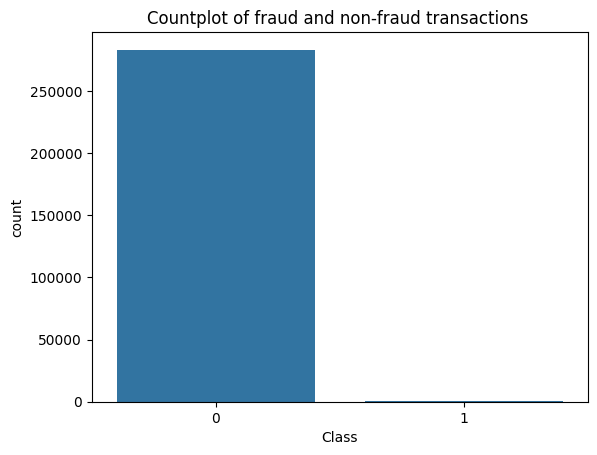

In [14]:

# Countplot of fraud and non-fraud transactions
sns.countplot(x='Class', data=data_df)
plt.title('Countplot of fraud and non-fraud transactions ')
plt.show()

In [23]:
 #Filter the DataFrame to create a subset containing only fraud and non-fraud transactions
fraud = data_df[data_df['Class']== 1]
legit = data_df[data_df['Class']== 0]

In [20]:
# Display statistics for the 'Amount' column in the fraud transactions subset
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [21]:
# Display statistics for the 'Amount' column in the non-fraud transactions subset
print(legit.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


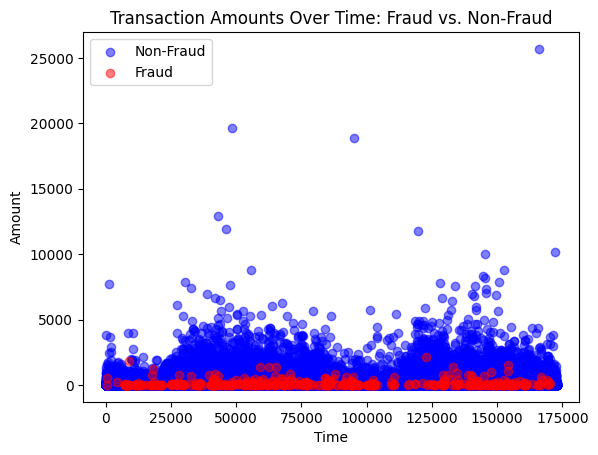

In [22]:
# Plot showing the distribution of transaction amounts over time

# Plot non-fraudulent transactions with blue color
plt.scatter(legit['Time'], legit['Amount'], c='blue', label='Non-Fraud', alpha=0.5)

# Plot fraudulent transactions with red color
plt.scatter(fraud['Time'], fraud['Amount'], c='red', label='Fraud', alpha=0.5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Transaction Amounts Over Time: Fraud vs. Non-Fraud')
plt.legend()

# Show the plot
plt.show()

<ipython-input-24-51c9d0c1a619>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=data_df, palette=colors)


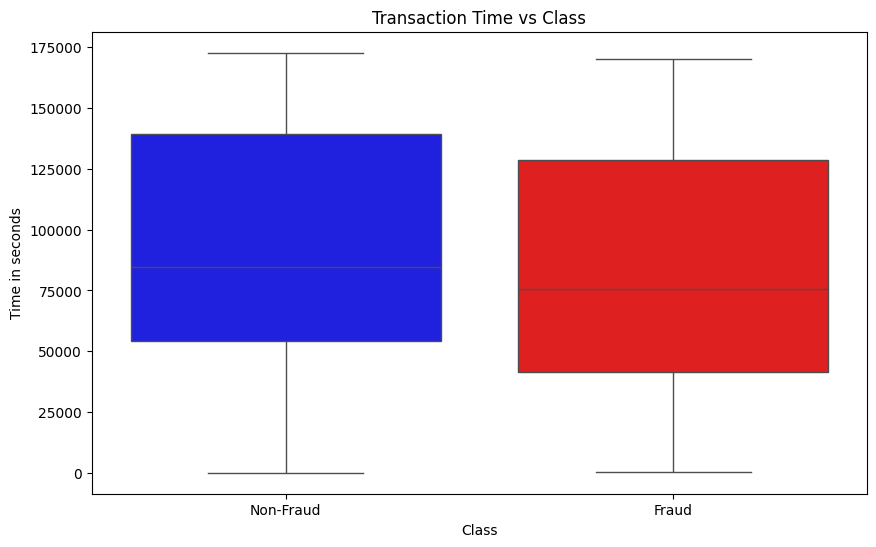

In [24]:


# Boxplot showing the distribution of transaction times for fraud and non-fraud transactions,

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# color definition
colors = ['blue', 'red']

# Create the boxplot with the custom color palette
sns.boxplot(x='Class', y='Time', data=data_df, palette=colors)

# Add title and labels to the plot
plt.title('Transaction Time vs Class')
plt.xlabel('Class')
plt.ylabel('Time in seconds')

# Customize the x-axis tick labels
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

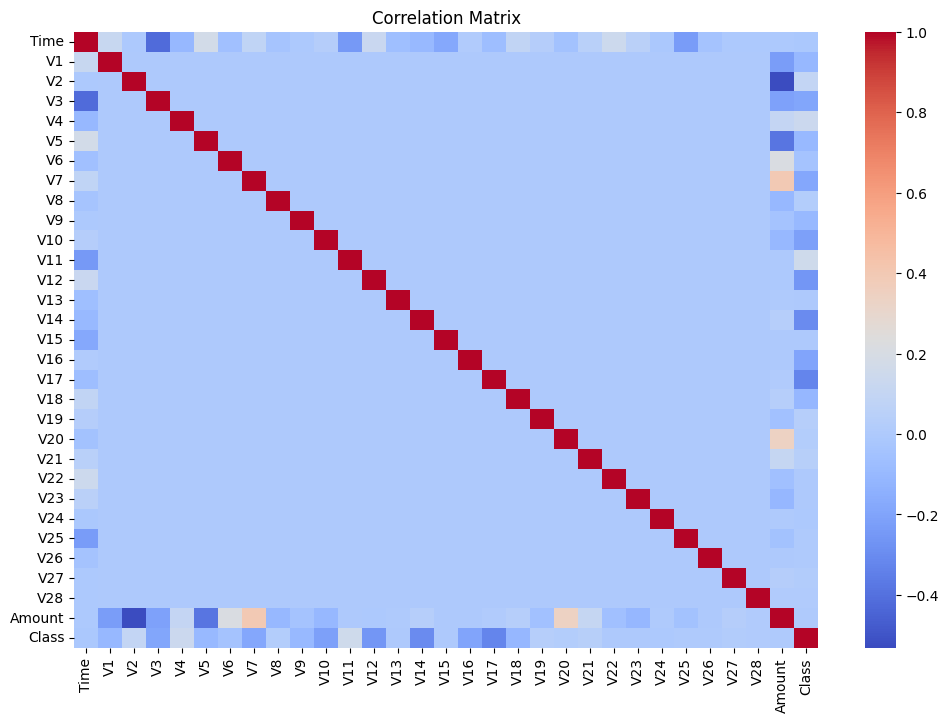

In [26]:
# Correlation matrix showing the relationship between various features

# Compute the correlation matrix
correlation_matrix = data_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')

# Add title to the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# **Preprocessing Stage**

In [27]:
# Scale the 'Amount' column
amount_values = data_df[['Amount']].values
scaler = RobustScaler()
data_df['Scaled_Amount'] = scaler.fit_transform(amount_values)

# Drop the original 'Amount' and 'Time' columns
data_df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Rename the 'Scaled_Amount' column to 'Amount'
data_df.rename(columns={'Scaled_Amount': 'Amount'}, inplace=True)

# Print the first few rows of the updated DataFrame
print(data_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

In [28]:
# Splitting of the datset into train and test subset
X = data_df.drop('Class', axis=1)
y = data_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# ***Anomaly Detection Phase***

In [29]:
#Building Isolation forest model

# Parameters
n_estimators = 250
contamination = 0.01
random_state = 5

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
iso_forest.fit(X_train)

# Predictions
y_train_pred = iso_forest.predict(X_train)
y_test_pred = iso_forest.predict(X_test)

In [30]:
# Convert predictions to binary labels
y_train_pred = np.where(y_train_pred == -1, 1, 0)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

# Get anomaly scores
iso_train_scores = iso_forest.decision_function(X_train)
iso_test_scores = iso_forest.decision_function(X_test)

In [32]:
# Evaluation
print("Isolation Forest Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))

Isolation Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      0.99     56858
  Fraudulent       0.11      0.62      0.18       104

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962



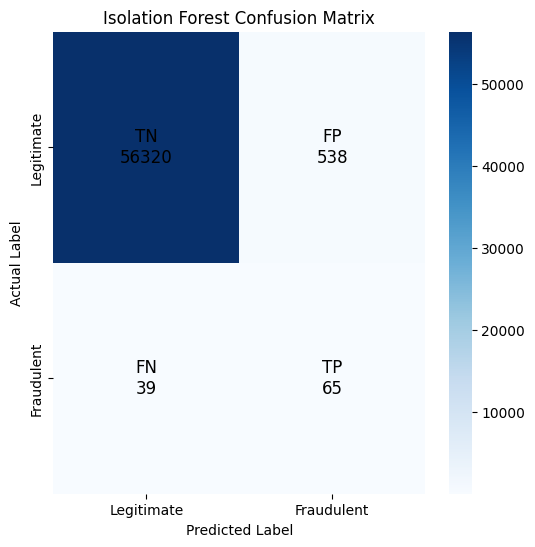

In [35]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=
 ['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center',
                 color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Isolation Forest Confusion Matrix')
plt.show()

In [36]:
#Model 2: Local Outlier Factor

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=300, contamination=0.17, novelty=False)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X_train)

# Convert predictions to binary labels (1 for outliers, 0 for inliers)
y_pred_converted = np.where(y_pred == 1, 0, 1)

In [37]:

# Generate the classification report
report = classification_report(y_train, y_pred_converted, target_names=['Non-Fraud', 'Fraud'])

# Output the classification report
print(report)

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.83      0.91    227457
       Fraud       0.01      0.91      0.02       388

    accuracy                           0.83    227845
   macro avg       0.50      0.87      0.46    227845
weighted avg       1.00      0.83      0.91    227845



In [40]:
# Calculate anomaly scores using the negative outlier factor
lof_anomaly_scores = -lof.negative_outlier_factor_


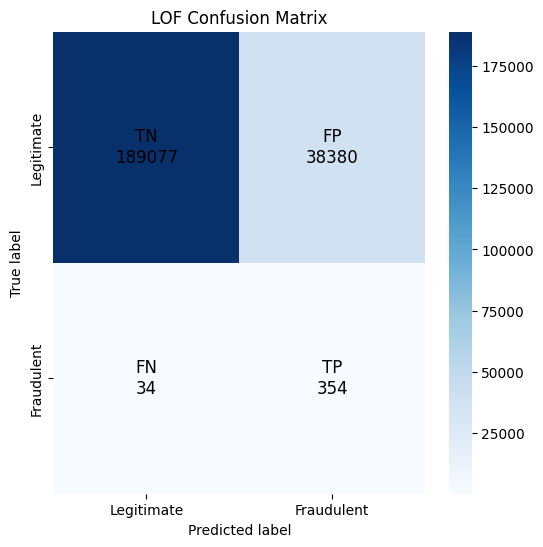

In [39]:
# Visualize the confusion matrix
cm = confusion_matrix(y_train, y_pred_converted)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('LOF Confusion Matrix')
plt.show()




In [41]:
#Model 3: Auto encoder
# Model architecture
batch_size = 32
original_dim = 29
latent_dim = 5
intermediate_dim1 = 20
intermediate_dim2 = 10
epochs = 10

x = Input(shape=(original_dim,), name="input")
h1 = Dense(intermediate_dim1, activation="tanh", name="encoding1", activity_regularizer=regularizers.l1(10e-5))(x)
h = Dense(intermediate_dim2, activation='relu', name="encoding")(h1)
z = Dense(latent_dim, activation='relu', name="encoder_out")(h)

encoder = Model(x, z, name="encoder")
encoder.summary()

decoder_h = Dense(intermediate_dim2, activation='relu', name="decoding1")(z)
decoder_h1 = Dense(intermediate_dim1, activation='tanh', name="decoding2")(decoder_h)
x_decoded = Dense(original_dim, activation='sigmoid', name="decoder_out")(decoder_h1)

autoencoder = Model(x, x_decoded)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding1 (Dense)                    │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_out (Dense)                  │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding1 (Dense)                    │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_out (Dense)                  │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoding1 (Dense)                    │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoding2 (Dense)                    │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_out (Dense)                  │ (None, 29)                  │             609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,754 (6.85 KB)

 Trainable params: 1,754 (6.85 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Training
history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1).history

# Extract loss values
loss = history['loss']
val_loss = history['val_loss']



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.4357 - mae: 0.6395 - mse: 1.4202 - val_loss: 1.2282 - val_mae: 0.5892 - val_mse: 1.2213
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3605 - mae: 0.5896 - mse: 1.3537 - val_loss: 1.2140 - val_mae: 0.5822 - val_mse: 1.2080
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.2863 - mae: 0.5808 - mse: 1.2802 - val_loss: 1.2017 - val_mae: 0.5729 - val_mse: 1.1958
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1.2396 - mae: 0.5726 - mse: 1.2337 - val_loss: 1.1955 - val_mae: 0.5690 - val_mse: 1.1888
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.2725 - mae: 0.5692 - mse: 1.2663 - val_loss: 1.1876 - val_mae: 0.5658 - val_mse: 1.1808
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.2761 - mae: 0.5666 - mse: 1.2699 - val_loss: 1.1820 - val_mae: 0.5627 - val_mse: 1.1760
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.2799 - mae: 0.564

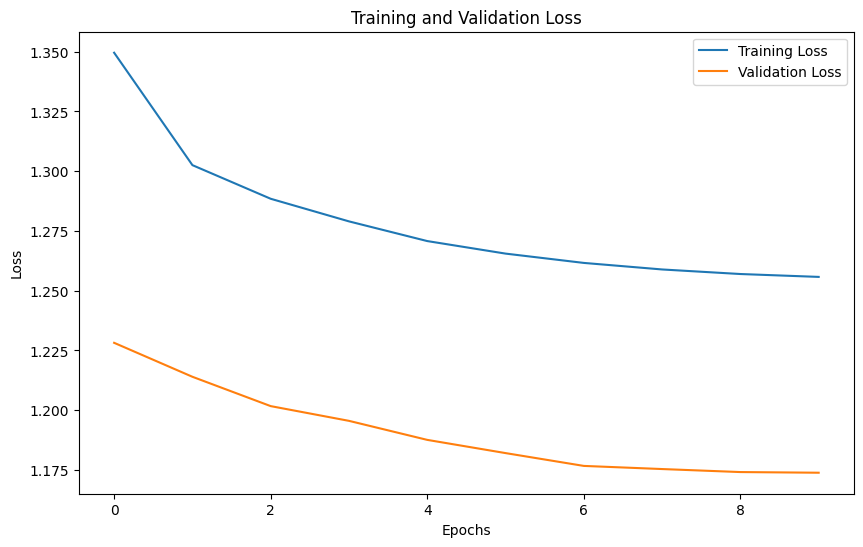

In [43]:


# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting training and validation loss
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()



In [44]:

# Reconstruction error
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)
train_reconstruction_error = np.mean(np.square(X_train - X_train_pred), axis=1)
test_reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)
threshold = np.percentile(train_reconstruction_error, 95)
print(f"Reconstruction error threshold: {threshold}")

# Anomaly detection
y_train_pred = (train_reconstruction_error > threshold).astype(int)
y_test_pred = (test_reconstruction_error > threshold).astype(int)



7121/7121 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Reconstruction error threshold: 2.6779248553554553


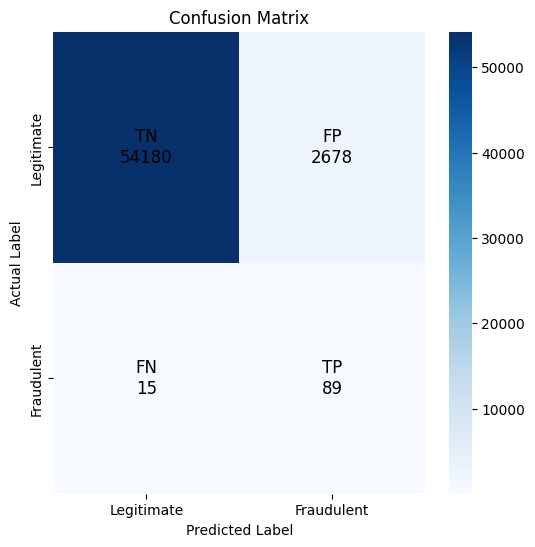

Autoencoder Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.95      0.98     56858
  Fraudulent       0.03      0.86      0.06       104

    accuracy                           0.95     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion Matrix:


In [46]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Autoencoder Evaluation
print("Autoencoder Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)



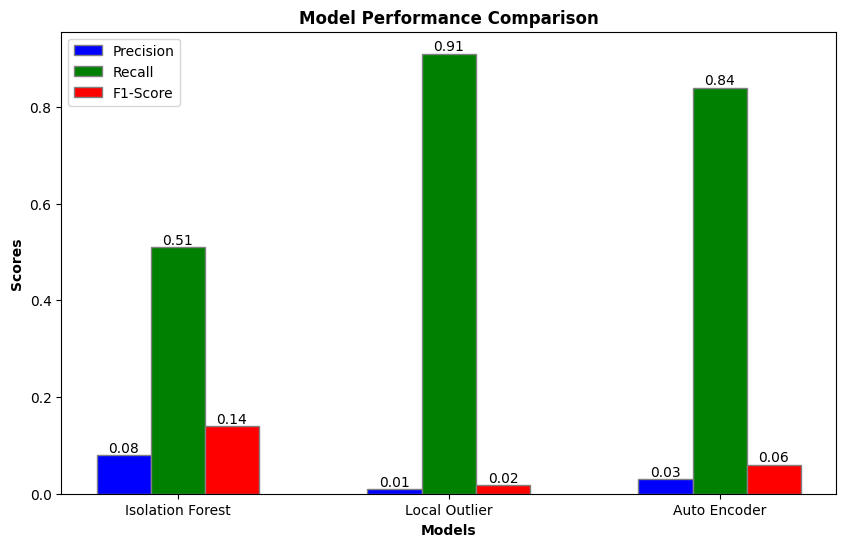

In [47]:


# Anomaly model Data
models = ['Isolation Forest', 'Local Outlier', 'Auto Encoder']
precision = [0.08, 0.009, 0.03]
recall = [0.51, 0.91, 0.84]
f1_score = [0.14, 0.018, 0.06]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
bars2 = plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
bars3 = plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add legend
plt.legend()

# Add value labels on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Show the plot
plt.show()

# **Predictive stage**



In [ ]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


# Step 1: Train Isolation Forest and compute anomaly scores
iso_forest = IsolationForest(n_estimators=250, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Compute anomaly scores (the lower, the more abnormal)
iso_train_scores = iso_forest.decision_function(X_train)
iso_test_scores = iso_forest.decision_function(X_test)

# Step 2: Add anomaly scores as features
iso_X_train_enriched = pd.DataFrame(X_train).copy()
iso_X_test_enriched = pd.DataFrame(X_test).copy()
iso_X_train_enriched['AnomalyScore'] = iso_train_scores
iso_X_test_enriched['AnomalyScore'] = iso_test_scores

# Step 3: Train a predictive model on the enriched dataset
predictive_model = RandomForestClassifier(n_estimators=100, random_state=42)
predictive_model.fit(iso_X_train_enriched, y_train)

# Predict using the enriched test set
y_test_pred = predictive_model.predict(iso_X_test_enriched)

# Evaluation
print("Evaluation on Test Set with Anomaly Score as Feature:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print(f"Precision: {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.94      0.84      0.89        92

    accuracy                           1.00     56746
   macro avg       0.97      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Evaluation without anomaly score
print("Evaluation on Test Set without Anomaly Score:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_without_anomaly, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_without_anomaly))

print(f"Precision: {precision_score(y_test, y_test_pred_without_anomaly):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_without_anomaly):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_without_anomaly):.2f}")



In [ ]:
# Step 3: Add anomaly scores as features
iso_X_train_enriched = pd.DataFrame(X_train).copy()
iso_X_test_enriched = pd.DataFrame(X_test).copy()
iso_X_train_enriched['AnomalyScore'] = iso_train_scores
iso_X_test_enriched['AnomalyScore'] = iso_test_scores

# Step 4: Train and Evaluate Random Forest With Anomaly Score
predictive_model_with_anomaly = RandomForestClassifier(n_estimators=100, random_state=42)
predictive_model_with_anomaly.fit(iso_X_train_enriched, y_train)

# Predict using the enriched test set
y_test_pred_with_anomaly = predictive_model_with_anomaly.predict(iso_X_test_enriched)



In [ ]:
# Evaluation with anomaly score
print("\nEvaluation on Test Set with Anomaly Score as Feature:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_with_anomaly, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_with_anomaly))

print(f"Precision: {precision_score(y_test, y_test_pred_with_anomaly):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred_with_anomaly):.2f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_with_anomaly):.2f}")


Evaluation on Test Set with Anomaly Score as Feature:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56654
  Fraudulent       0.97      0.84      0.90        92

    accuracy                           1.00     56746
   macro avg       0.99      0.92      0.95     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56652     2]
 [   15    77]]
Precision: 0.97
Recall: 0.84


TypeError: 'list' object is not callable

#LOF as a feature with Random Forest


In [ ]:


# Train and Evaluate Random Forest Without Anomaly Score
model_original = RandomForestClassifier(n_estimators=100, random_state=42)
model_original.fit(X_train, y_train)

# Predict using the original test set
y_pred_original = model_original.predict(X_test)



In [ ]:
# Evaluation without anomaly score
print("\nOriginal Random Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_original, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))

print(f"Precision: {precision_score(y_test, y_pred_original):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_original):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_original):.2f}")



In [ ]:
# Enrich the datasets with anomaly scores
lof_anomaly_scores_test = -lof.fit(X_test).negative_outlier_factor_
X_train_enriched = np.hstack((X_train, lof_anomaly_scores.reshape(-1, 1)))
X_test_enriched = np.hstack((X_test, lof_anomaly_scores_test.reshape(-1, 1)))

#  Train and Evaluate Random Forest With Anomaly Score
model_enriched = RandomForestClassifier(n_estimators=100, random_state=42)
model_enriched.fit(X_train_enriched, y_train)

# Predict using the enriched test set
y_pred_enriched = model_enriched.predict(X_test_enriched)



In [ ]:
# Evaluation with anomaly score
print("\nEnriched Random Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_enriched, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_enriched))

print(f"Precision: {precision_score(y_test, y_pred_enriched):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_enriched):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_enriched):.2f}")

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Train and Evaluate Gradient Boosting Without Anomaly Score
model_original = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_original.fit(X_train, y_train)

# Predict using the original test set
y_pred_original = model_original.predict(X_test)




Original Gradient Boosting Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56656
  Fraudulent       0.89      0.63      0.74        90

    accuracy                           1.00     56746
   macro avg       0.95      0.82      0.87     56746
weighted avg       1.00      1.00      1.00     56746



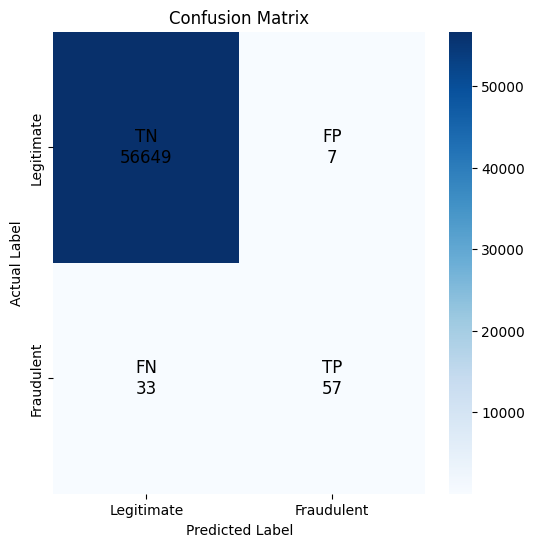

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluation without anomaly score
print("\nOriginal Gradient Boosting Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_original, target_names=['Legitimate', 'Fraudulent']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
# XGboost classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train and Evaluate XGBoost Without Anomaly Score
model_original = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model_original.fit(X_train, y_train)

# Predict using the original test set
Xgb_y_pred_original = model_original.predict(X_test)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56656
  Fraudulent       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



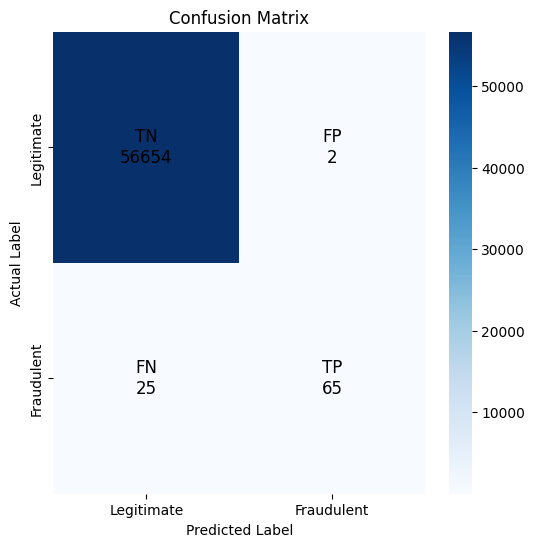

In [ ]:
# Evaluation
print("\nXGBoost Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, Xgb_y_pred_original, target_names=['Legitimate', 'Fraudulent']))

# Confusion Matrix
cm = confusion_matrix(y_test, Xgb_y_pred_original)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train and Evaluate Logistic Regression
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train, y_train)

# Predict using the original test set
lr_y_pred_original = model_original.predict(X_test)




Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56656
  Fraudulent       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



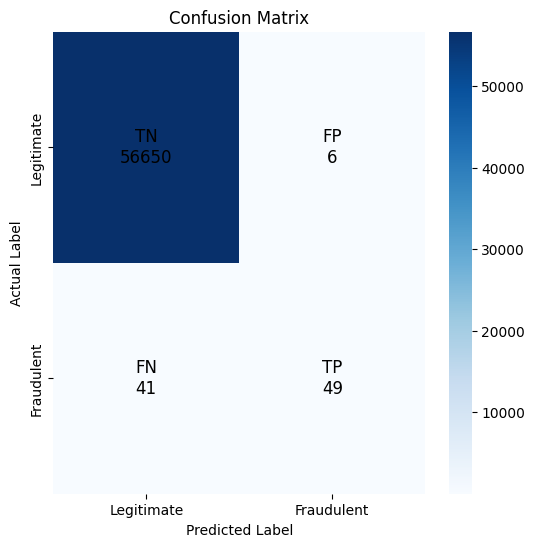

In [ ]:
# Evaluation
print("\nLogistic Regression Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, lr_y_pred_original, target_names=['Legitimate', 'Fraudulent']))

# Confusion Matrix
cm = confusion_matrix(y_test, lr_y_pred_original)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#  Enrich the datasets with anomaly scores
lof_anomaly_scores_test = -lof.fit(X_test).negative_outlier_factor_
X_train_enriched = np.hstack((X_train, lof_anomaly_scores.reshape(-1, 1)))
X_test_enriched = np.hstack((X_test, lof_anomaly_scores_test.reshape(-1, 1)))

# Train and Evaluate Gradient Boosting With Anomaly Score
model_enriched = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_enriched.fit(X_train_enriched, y_train)

# Predict using the enriched test set
y_pred_enriched = model_enriched.predict(X_test_enriched)



In [ ]:
# Evaluation with anomaly score
print("\nEnriched Gradient Boosting Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_enriched, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_enriched))

print(f"Precision: {precision_score(y_test, y_pred_enriched):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_enriched):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_enriched):.2f}")

AutoEncoder with GradientBoost

In [ ]:


#  Extract Encoded Features
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Calculate Reconstruction Errors (Anomaly Scores)
X_train_reconstructed = autoencoder.predict(X_train)
X_test_reconstructed = autoencoder.predict(X_test)

train_anomaly_scores = np.mean(np.square(X_train - X_train_reconstructed), axis=1)
test_anomaly_scores = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

# Train Gradient Boosting Without Anomaly Scores
gb_model_original = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_original.fit(X_train, y_train)

# Predict using the original test set
y_pred_original = gb_model_original.predict(X_test)



In [ ]:
# Evaluation without anomaly score
print("Original Gradient Boosting Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_original, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
cm_original = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Original Gradient Boosting')
plt.show()

print(f"Precision: {precision_score(y_test, y_pred_original):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_original):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_original):.2f}")



In [ ]:


# Convert anomaly scores to numpy arrays and reshape
train_anomaly_scores = np.array(train_anomaly_scores).reshape(-1, 1)
test_anomaly_scores = np.array(test_anomaly_scores).reshape(-1, 1)

# Enrich the datasets with anomaly scores
X_train_enriched = np.hstack((X_train, train_anomaly_scores))
X_test_enriched = np.hstack((X_test, test_anomaly_scores))

# Train Gradient Boosting With Anomaly Scores
gb_model_enriched = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_enriched.fit(X_train_enriched, y_train)

# Predict using the enriched test set
y_pred_enriched = gb_model_enriched.predict(X_test_enriched)



In [ ]:
# Evaluation with anomaly score
print("\nEnriched Gradient Boosting Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_enriched, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
cm_enriched = confusion_matrix(y_test, y_pred_enriched)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_enriched, annot=True, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Enriched Gradient Boosting')
plt.show()

print(f"Precision: {precision_score(y_test, y_pred_enriched):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_enriched):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_enriched):.2f}")

# using stacking method with anomaly detection model

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Further split training set for stacking (train and validation)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=5)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor
# Apply SMOTE to the base training set to address data imbalance
smote = SMOTE(random_state=5)
X_train_base_resampled, y_train_base_resampled = smote.fit_resample(X_train_base, y_train_base)

# Anomaly Detection Phase
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train_base_resampled)
anomaly_scores = -lof.decision_function(X_train_meta)  # Higher scores indicate more abnormal

# Train base models on the resampled (balanced) data
rf = RandomForestClassifier(n_estimators=100, random_state=5, n_jobs=-1, class_weight='balanced')
gb = GradientBoostingClassifier(n_estimators=100, random_state=5)  # GradientBoostingClassifier does not support n_jobs

rf.fit(X_train_base_resampled, y_train_base_resampled)
gb.fit(X_train_base_resampled, y_train_base_resampled)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


GradientBoostingClassifier(random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Predict with base models to create new features for meta-model
rf_predictions = rf.predict_proba(X_train_meta)[:, 1]  # Probability for class 1
gb_predictions = gb.predict_proba(X_train_meta)[:, 1]  # Probability for class 1

# Combine predictions with anomaly scores
X_train_meta_combined = np.vstack((rf_predictions, gb_predictions, anomaly_scores)).T

# Train meta-model
# Using Logistic Regression as the meta-model with balanced class weights
meta_model = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight='balanced')
meta_model.fit(X_train_meta_combined, y_train_meta)

# Prepare test data for final prediction
# Generate anomaly scores for test data
anomaly_scores_test = -lof.decision_function(X_test)

# Predict with base models on test data
rf_predictions_test = rf.predict_proba(X_test)[:, 1]
gb_predictions_test = gb.predict_proba(X_test)[:, 1]

# Combine predictions with anomaly scores for test data
X_test_combined = np.vstack((rf_predictions_test, gb_predictions_test, anomaly_scores_test)).T

# Final prediction with meta-model
probabilities = meta_model.predict_proba(X_test_combined)[:, 1]
threshold = 0.3  # Adjust based on precision-recall trade-offs
final_predictions = (probabilities >= threshold).astype(int)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve, auc
# Evaluation
print(classification_report(y_test, final_predictions))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, probabilities)
auc_score = auc(recall, precision)
print(f'Precision-Recall AUC: {auc_score:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56654
           1       0.10      0.92      0.18        92

    accuracy                           0.99     56746
   macro avg       0.55      0.96      0.59     56746
weighted avg       1.00      0.99      0.99     56746

Precision-Recall AUC: 0.85


In [ ]:
# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Remove NaN values
f1_scores = np.nan_to_num(f1_scores)

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.9669494977523654


In [ ]:
# Apply the optimal threshold to classify probabilities
final_predictions_optimal = (probabilities >= optimal_threshold).astype(int)

# Evaluation with the optimal threshold
print(classification_report(y_test, final_predictions_optimal))

# Recalculate Precision-Recall AUC with the optimal threshold (for comparison)
precision_opt, recall_opt, _ = precision_recall_curve(y_test, final_predictions_optimal)
auc_score_opt = auc(recall_opt, precision_opt)
print(f'Precision-Recall AUC with Optimal Threshold: {auc_score_opt:.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.96      0.78      0.86        92

    accuracy                           1.00     56746
   macro avg       0.98      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Precision-Recall AUC with Optimal Threshold: 0.87


LOF as Anomaly with XGBClassifier

In [ ]:
from xgboost import XGBClassifier


# Apply SMOTE to the base training set to address data imbalance
smote = SMOTE(random_state=5)
X_train_base_resampled, y_train_base_resampled = smote.fit_resample(X_train_base, y_train_base)

# Anomaly Detection
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train_base_resampled)
anomaly_scores_train_meta = -lof.decision_function(X_train_meta)  # Higher scores indicate more abnormal

#  Train base models on the resampled (balanced) data
xgb = XGBClassifier(n_estimators=100, random_state=5, use_label_encoder=False, eval_metric='logloss')
gb = GradientBoostingClassifier(n_estimators=100, random_state=5)

xgb.fit(X_train_base_resampled, y_train_base_resampled)
gb.fit(X_train_base_resampled, y_train_base_resampled)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:52:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GradientBoostingClassifier(random_state=5)

In [ ]:
# Predict with base models to create new features for meta-model
xgb_predictions = xgb.predict_proba(X_train_meta)[:, 1]  # Probability for class 1
gb_predictions = gb.predict_proba(X_train_meta)[:, 1]  # Probability for class 1

# Combine predictions with anomaly scores
X_train_meta_combined = np.vstack((xgb_predictions, gb_predictions, anomaly_scores_train_meta)).T

# Train meta-model
# Using Logistic Regression as the meta-model with balanced class weights
meta_model = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight='balanced')
meta_model.fit(X_train_meta_combined, y_train_meta)

# Prepare test data for final prediction
anomaly_scores_test = -lof.decision_function(X_test)

# Predict with base models on test data
xgb_predictions_test = xgb.predict_proba(X_test)[:, 1]
gb_predictions_test = gb.predict_proba(X_test)[:, 1]

# Combine predictions with anomaly scores for test data
X_test_combined = np.vstack((xgb_predictions_test, gb_predictions_test, anomaly_scores_test)).T

# Final prediction with meta-model
probabilities = meta_model.predict_proba(X_test_combined)[:, 1]
threshold = 0.3  # Adjust based on precision-recall trade-offs
final_predictions = (probabilities >= threshold).astype(int)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluation
print(classification_report(y_test, final_predictions))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, probabilities)
auc_score = auc(recall, precision)
print(f'Precision-Recall AUC: {auc_score:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56654
           1       0.07      0.91      0.13        92

    accuracy                           0.98     56746
   macro avg       0.53      0.95      0.56     56746
weighted avg       1.00      0.98      0.99     56746

Precision-Recall AUC: 0.85


In [ ]:
# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Remove NaN values
f1_scores = np.nan_to_num(f1_scores)

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.9999646785685934


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.97      0.80      0.88        92

    accuracy                           1.00     56746
   macro avg       0.99      0.90      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Precision-Recall AUC with Optimal Threshold: 0.89


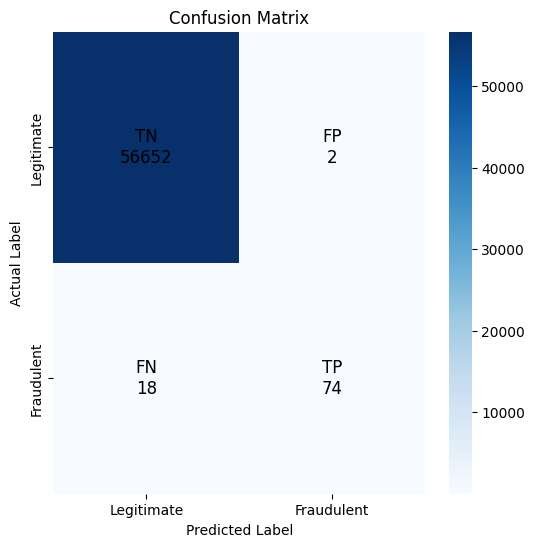

In [ ]:
# Apply the optimal threshold to classify probabilities
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test, probabilities, and optimal_threshold are already defined
final_predictions_optimal = (probabilities >= optimal_threshold).astype(int)

# Evaluation with the optimal threshold
print(classification_report(y_test, final_predictions_optimal))

# Recalculate Precision-Recall AUC with the optimal threshold (for comparison)
precision_opt, recall_opt, _ = precision_recall_curve(y_test, final_predictions_optimal)
auc_score_opt = auc(recall_opt, precision_opt)
print(f'Precision-Recall AUC with Optimal Threshold: {auc_score_opt:.2f}')

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, final_predictions_optimal)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Hybrid Confusion Matrix')
plt.show()

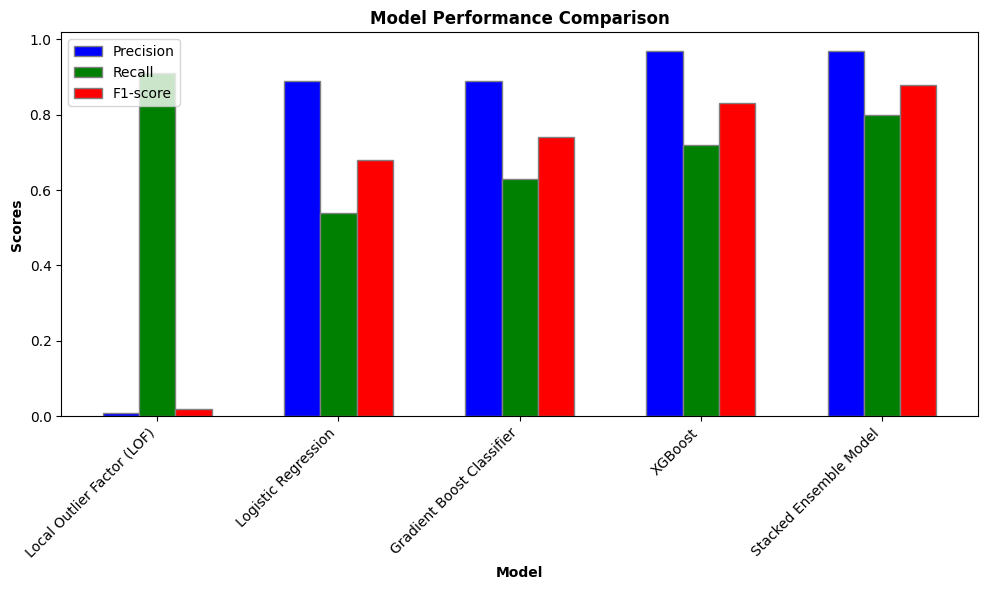

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Local Outlier Factor (LOF)', 'Logistic Regression', 'Gradient Boost Classifier', 'XGBoost', 'Stacked Ensemble Model']
precision = [0.009, 0.89, 0.89, 0.97, 0.97]
recall = [0.91, 0.54, 0.63, 0.72, 0.80]
f1_score = [0.018, 0.68, 0.74, 0.83, 0.88]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

# Add labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()